## Explorative Data Analysis

### Reading the data

In [ ]:
# Load required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/ee/biaf_wrms_pnp__sample.csv")
df2 = pd.read_csv("/content/drive/MyDrive/ee/cimmyt__sample.csv")
df = pd.concat([df1,df2])

In [ ]:
# check column names
df.columns

Index(['system:index', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
       'Id', 'OC', 'VH', 'VV', 'bai', 'bsi', 'elevation', 'evi', 'lai', 'nbr',
       'ndmi', 'ndvi', 'ndwi', 'savi', 'skin_temperature', 'slope',
       'total_precipitation', '.geo'],
      dtype='object')

In [ ]:
# Print the first 5 rows of the DataFrame
df.head()

,system:index,B11,B12,B2,B3,B4,B5,B6,B7,B8,...,lai,nbr,ndmi,ndvi,ndwi,savi,skin_temperature,slope,total_precipitation,.geo
0,1_1_00000000000000000000_0,3210,2518,777,1122,1378,1707,2239,2478,2732,...,1.191717,0.040762,-0.080444,0.329440,0.417748,0.494100,299.937424,3.603270,0.001873,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1_1_00000000000000000001_0,3379,2756,757,1130,1216,1830,2642,2887,3133,...,1.594531,0.064018,-0.037776,0.440791,0.469857,0.661110,299.937424,4.825890,0.001873,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,1_1_00000000000000000002_0,4205,3637,1170,1650,1992,2509,2978,3373,3465,...,0.976479,-0.024219,-0.096480,0.269929,0.354839,0.404856,299.937424,5.133844,0.001873,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,1_1_00000000000000000003_0,3613,2970,1042,1500,1766,2229,2834,3143,3090,...,0.986317,0.019802,-0.078025,0.272652,0.346405,0.408936,299.937424,3.606118,0.001873,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,1_1_00000000000000000004_0,3589,3248,979,1392,1776,2127,2545,2731,2722,...,0.760806,-0.088107,-0.137379,0.210316,0.323286,0.315438,299.937424,2.260778,0.001873,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [ ]:
# Print the shape of the DataFrame
print("Shape:", df.shape)

Shape: (1117, 28)


In [ ]:
# Print the data types of the columns
print(df.dtypes)

system:index            object
B11                      int64
B12                      int64
B2                       int64
B3                       int64
B4                       int64
B5                       int64
B6                       int64
B7                       int64
B8                       int64
Id                      object
OC                     float64
VH                     float64
VV                     float64
bai                    float64
bsi                    float64
elevation                int64
evi                    float64
lai                    float64
nbr                    float64
ndmi                   float64
ndvi                   float64
ndwi                   float64
savi                   float64
skin_temperature       float64
slope                  float64
total_precipitation    float64
.geo                    object
dtype: object


In [ ]:
# Print summary statistics for the columns
print(df.describe())

               B11          B12           B2           B3           B4  \
count  1117.000000  1117.000000  1117.000000  1117.000000  1117.000000   
mean   2872.865712  2489.065354  1074.958818  1364.307073  1593.401074   
std     717.229900   859.899265   241.625966   333.469114   522.295049   
min     374.000000   227.000000   452.000000   567.000000   560.000000   
25%    2316.000000  1801.000000   897.000000  1104.000000  1190.000000   
50%    2812.000000  2315.000000  1084.000000  1312.000000  1448.000000   
75%    3488.000000  3302.000000  1248.000000  1614.000000  2060.000000   
max    4482.000000  4439.000000  1776.000000  2400.000000  3086.000000   

                B5           B6           B7          B8           OC  ...  \
count  1117.000000  1117.000000  1117.000000  1117.00000  1117.000000  ...   
mean   1856.520143  2129.767234  2297.383169  2345.85855     0.340174  ...   
std     509.773605   462.873123   482.962945   508.33545     0.123191  ...   
min     834.000000   

In [ ]:
# Check for missing values
print("Missing Values:", df.isnull().sum().sum())

Missing Values: 0


In [ ]:
df = df[['B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
       'VH', 'VV', 'bai', 'bsi', 'elevation', 'evi', 'lai', 'nbr',
       'ndmi', 'ndvi', 'ndwi', 'savi', 'skin_temperature', 'slope',
       'total_precipitation','OC']]

In [ ]:
#Define the dependent variable
dependent_var = "OC"

# Define the independent variables
independent_vars = list(df.drop(dependent_var, axis=1))
print(independent_vars)

['B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'VH', 'VV', 'bai', 'bsi', 'elevation', 'evi', 'lai', 'nbr', 'ndmi', 'ndvi', 'ndwi', 'savi', 'skin_temperature', 'slope', 'total_precipitation']


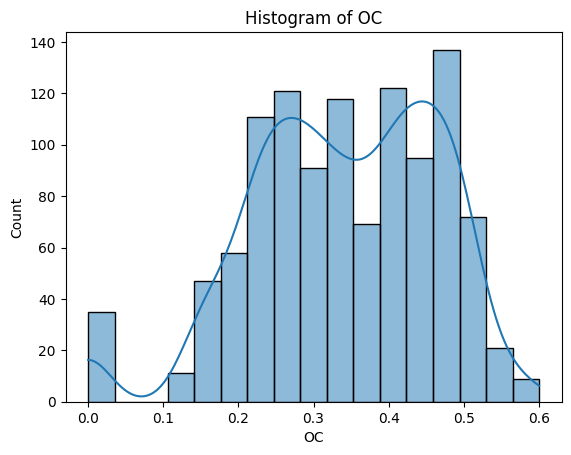

In [ ]:
# Plot a histogram of the dependent variable
sns.histplot(df["OC"], kde=True)
plt.title("Histogram of OC")
plt.xlabel("OC")
plt.ylabel("Count")
plt.show()

Number of outliers removed: 0


<Axes: xlabel='OC', ylabel='Count'>

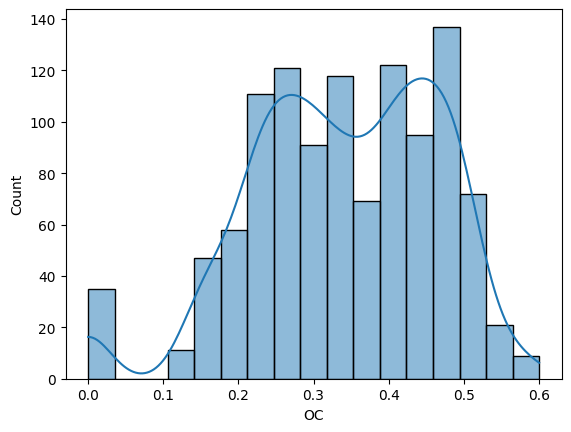

In [ ]:
# remove outliers in OC

len_before = len(df)
# Calculate the IQR for the OC column
Q1 = df[dependent_var].quantile(0.25)
Q3 = df[dependent_var].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers from the DataFrame
df = df[(df[dependent_var] >= lower_bound) & (df[dependent_var] <= upper_bound)]

len_after = len(df)

print("Number of outliers removed:", len_before - len_after)
#histogram after removing outliers
sns.histplot(df["OC"], kde=True)



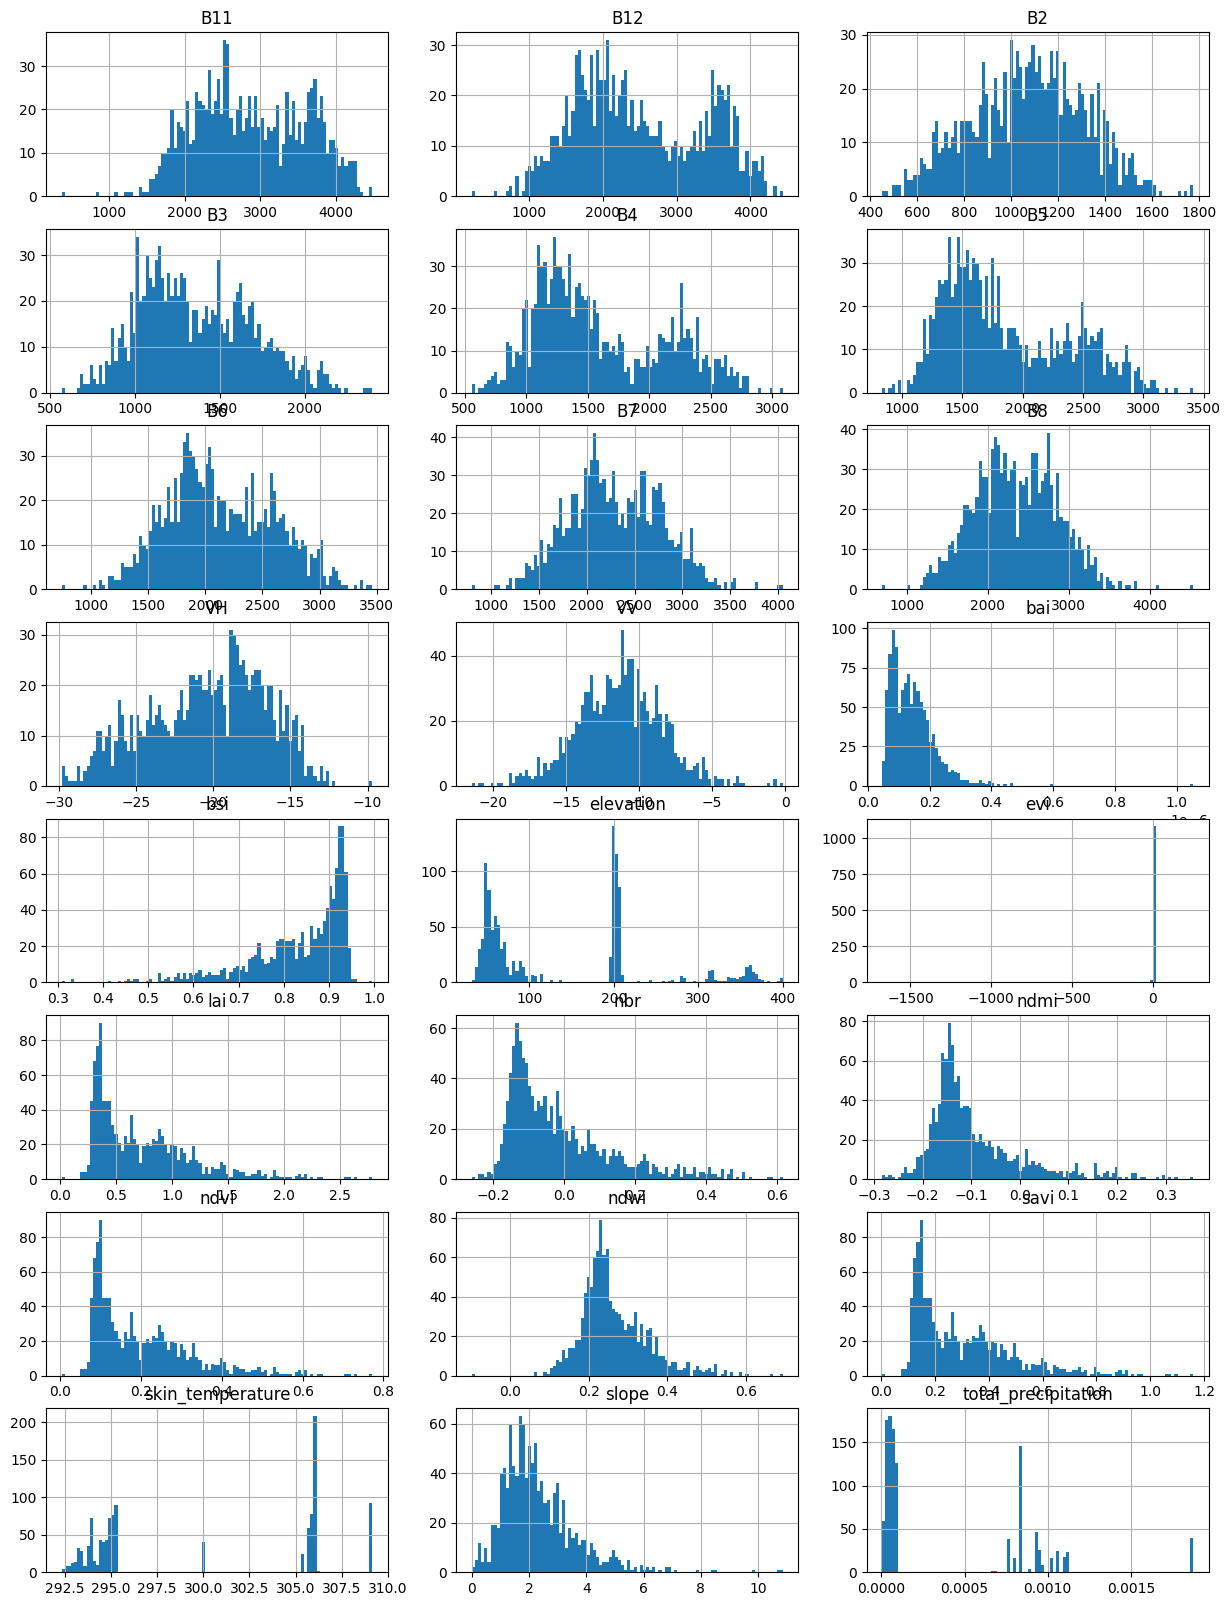

In [ ]:
# distribution of all the independent variables - multi chart
fig, axes = plt.subplots(8, 3, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(independent_vars):
    df[col].hist(bins=100, ax=axes[i])
    axes[i].set_title(col)
plt.show()

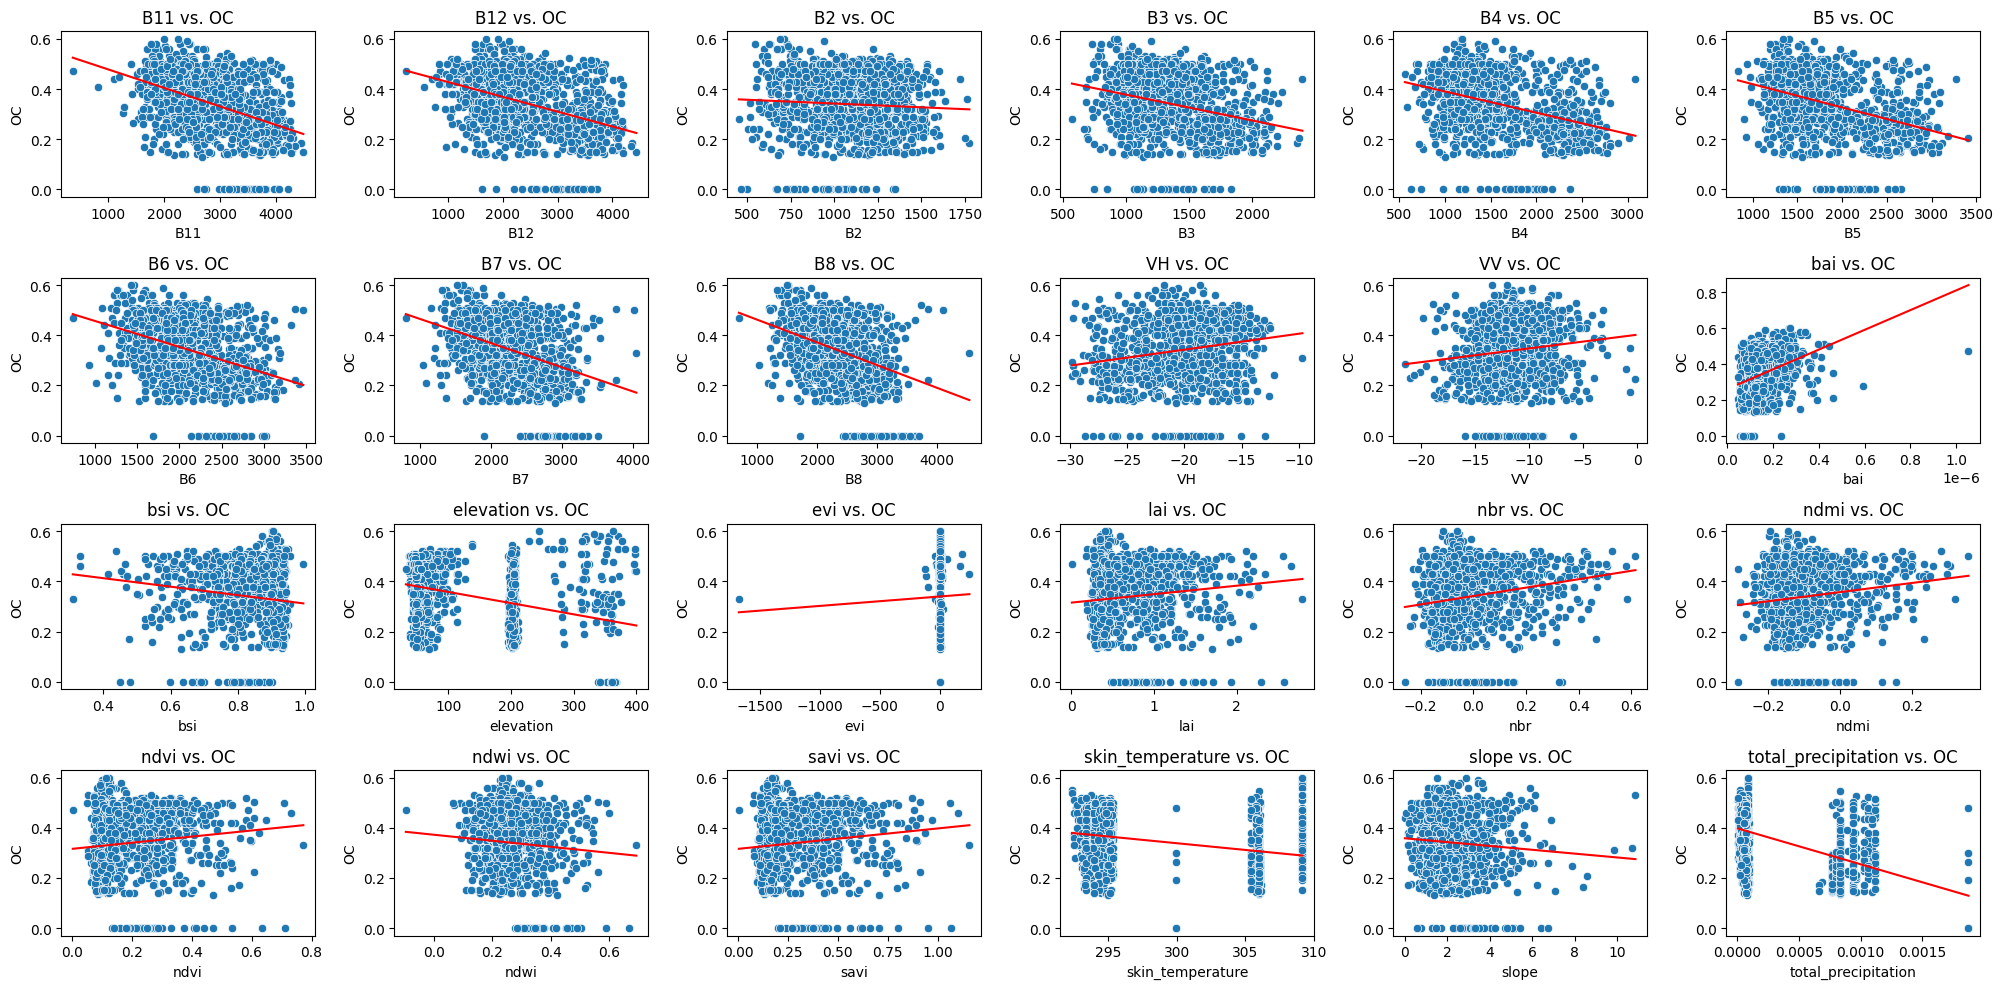

In [ ]:
# Create a figure with subplots for each independent variable
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

# Loop through each independent variable and plot a scatter plot with fit line
for i, var in enumerate(independent_vars):
    # Calculate the row and column indices for the current subplot
    row = i // 6
    col = i % 6

    # Plot the scatter plot
    sns.scatterplot(x=var, y=dependent_var, data=df, ax=axs[row, col])
    axs[row, col].set_title(var + " vs. " + dependent_var)

    # Calculate the slope and intercept of the fit line
    slope, intercept, r_value, p_value, std_err = linregress(df[var], df[dependent_var])

    # Create a range of x values for the fit line
    x_range = np.linspace(df[var].min(), df[var].max(), 100)

    # Calculate the y values for the fit line
    y_range = slope * x_range + intercept

    # Plot the fit line
    axs[row, col].plot(x_range, y_range, color="red")

plt.tight_layout()
plt.show()

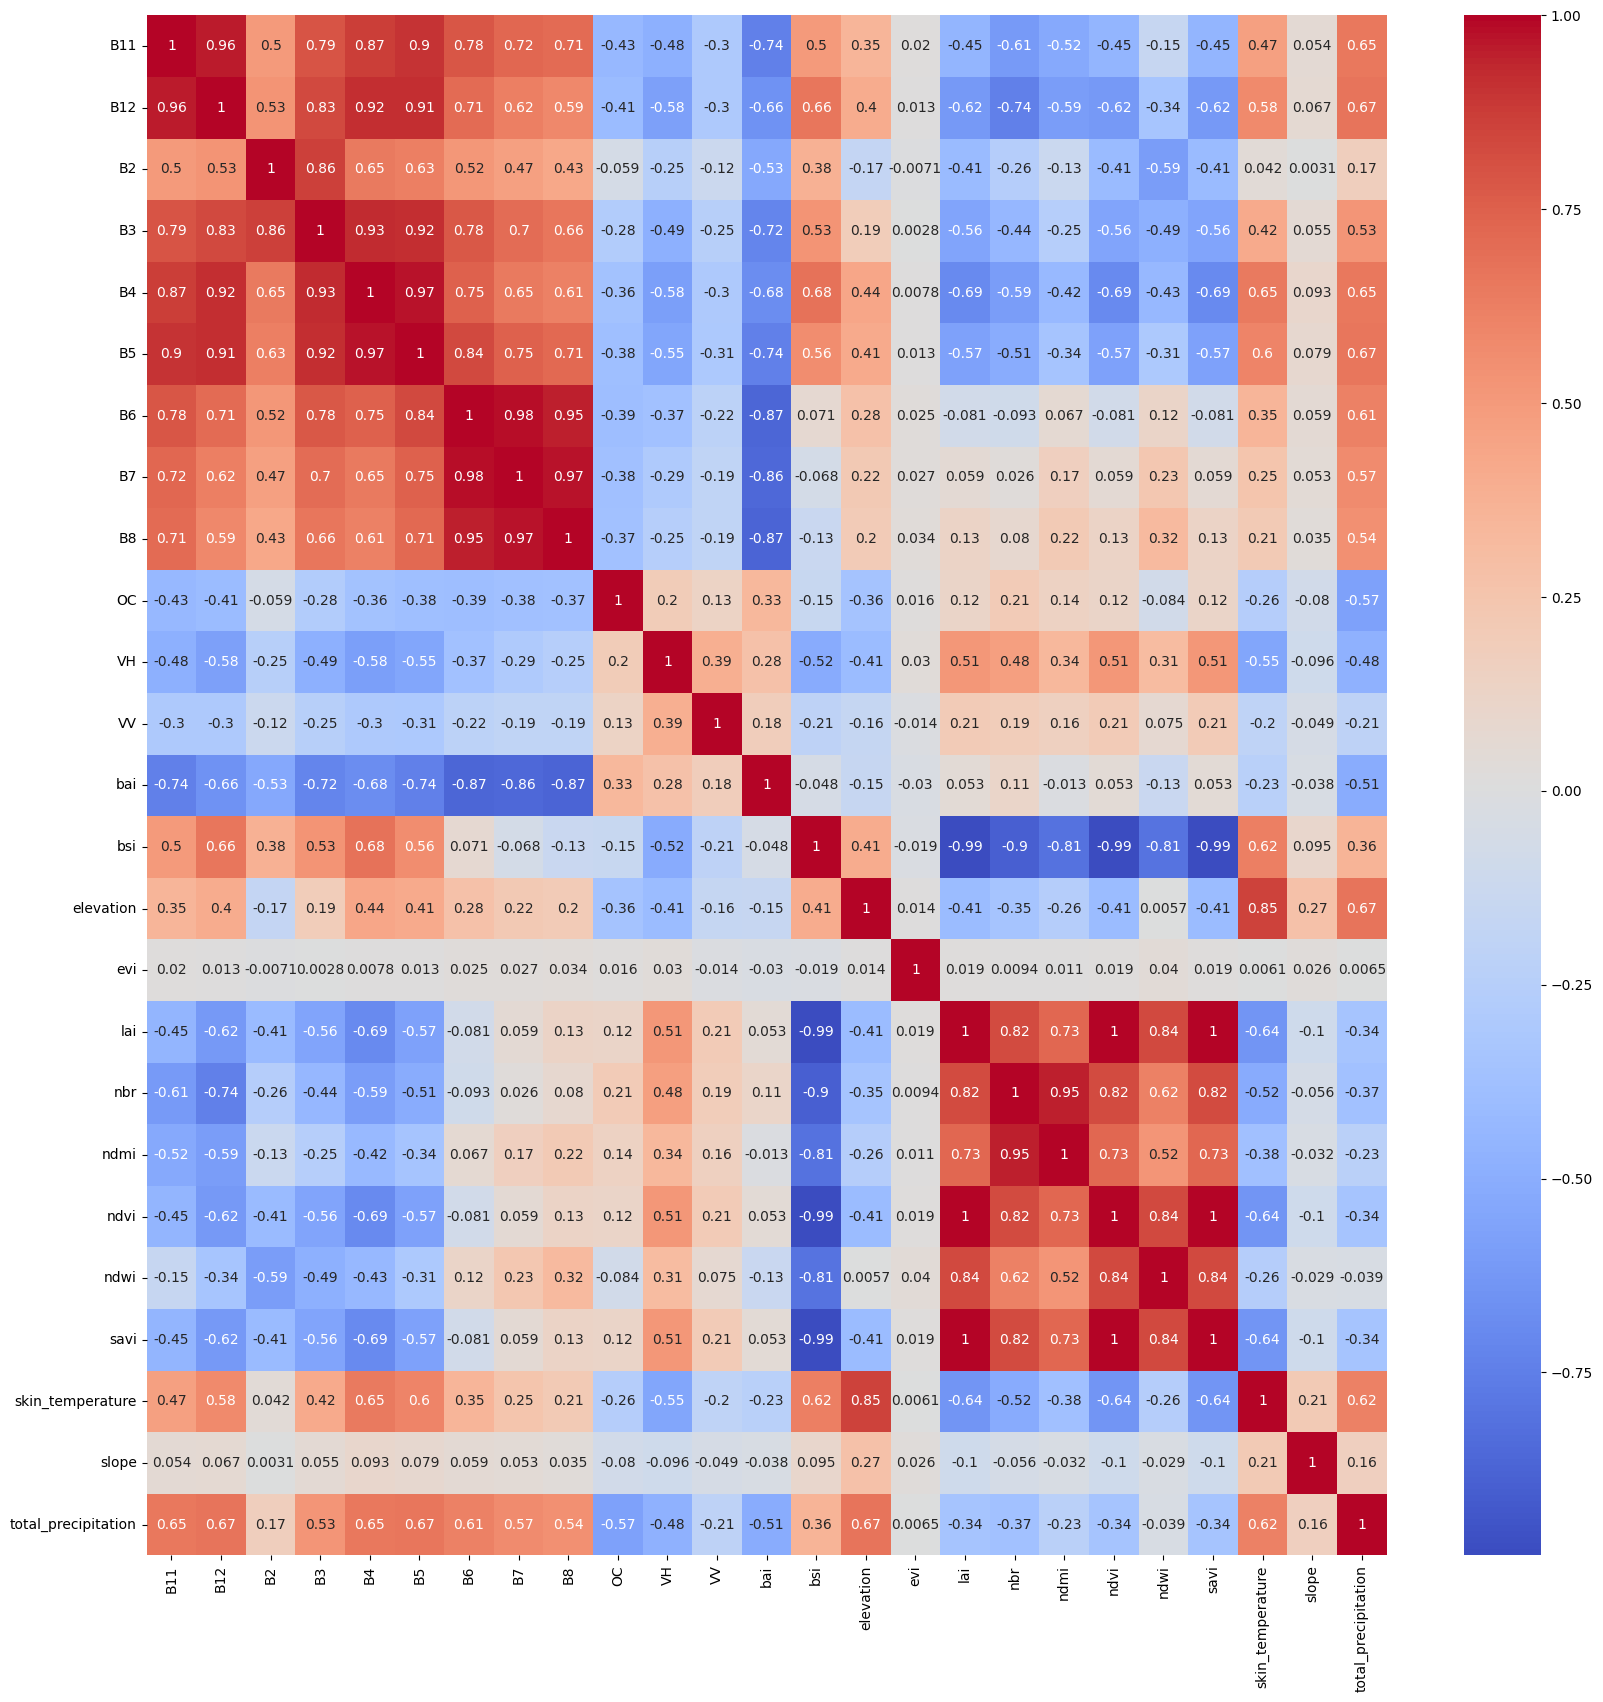

In [ ]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix .style.background_gradient(cmap='coolwarm')

#plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix , annot=True, cmap="coolwarm")
plt.show()


# remove highly correlated variables


In [ ]:
# save the data

# df.to_csv("/content/drive/MyDrive/ee/soilify_training_cleaned.csv", index=False)